In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sunxin/minico

1.13.2
2.2.4


Using TensorFlow backend.


In [2]:
import shutil
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
original_dataset_dir = "../dogs_vs_cats/train/"
base_dir = "../cats_and_dogs_small"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              # optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [7]:
train_datagen = ImageDataGenerator(rescale=1 / 255)
test_datagen = ImageDataGenerator(rescale=1 / 255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=20, class_mode="binary")
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode="binary")
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [8]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=validation_generator, validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6929 - acc: 0.5355 - val_loss: 0.6756 - val_acc: 0.5660
Epoch 2/30
100/100 [==============================] - 5s 51ms/step - loss: 0.6586 - acc: 0.6160 - val_loss: 0.6472 - val_acc: 0.6190
Epoch 3/30
100/100 [==============================] - 5s 51ms/step - loss: 0.6155 - acc: 0.6590 - val_loss: 0.6093 - val_acc: 0.6570
Epoch 4/30
100/100 [==============================] - 5s 51ms/step - loss: 0.5750 - acc: 0.7020 - val_loss: 0.5893 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5360 - acc: 0.7250 - val_loss: 0.5940 - val_acc: 0.6720
Epoch 6/30
100/100 [==============================] - 5s 51ms/step - loss: 0.5045 - acc: 0.7390 - val_loss: 0.6274 - val_acc: 0.6690
Epoch 7/30
100/100 [==============================] - 5s 51ms/step - loss: 0.4741 - acc: 0.7805 - val_loss: 0.5684 - val_acc: 0.6970
Epoch 8/30
100/100 [=

In [9]:
model.save("cats_and_dogs_small_1.h5")

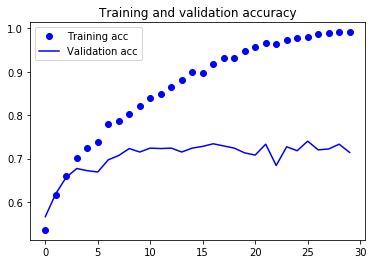

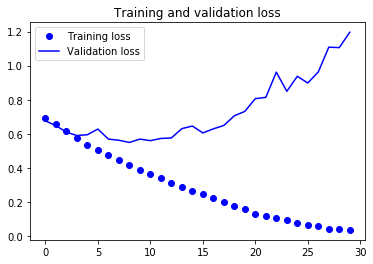

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Using data augmentation

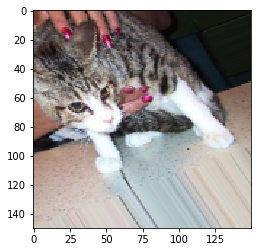

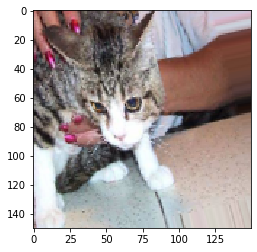

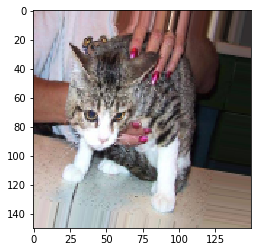

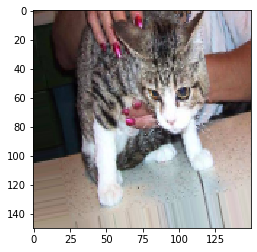

In [11]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True,
                             fill_mode='nearest')
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [12]:
train_datagen = ImageDataGenerator(rescale=1 / 255, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1 / 255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode="binary")
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        # I guess batch_size=32 is wrong
                                                        batch_size=20, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss="binary_crossentropy",
              metrics=["accuracy"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 20s 195ms/step - loss: 0.6911 - acc: 0.5341 - val_loss: 0.6761 - val_acc: 0.5420
Epoch 2/100
100/100 [==============================] - 17s 169ms/step - loss: 0.6733 - acc: 0.5828 - val_loss: 0.6501 - val_acc: 0.6130
Epoch 3/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6675 - acc: 0.5841 - val_loss: 0.6408 - val_acc: 0.6220
Epoch 4/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6528 - acc: 0.6088 - val_loss: 0.6328 - val_acc: 0.6380
Epoch 5/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6380 - acc: 0.6234 - val_loss: 0.6037 - val_acc: 0.6740
Epoch 6/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6225 - acc: 0.6575 - val_loss: 0.5844 - val_acc: 0.6880
Epoch 7/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6149 - acc: 0.6578 - val_loss: 0.5728 - val_acc: 0.6950
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 17s 172ms/step - loss: 0.4099 - acc: 0.8078 - val_loss: 0.4283 - val_acc: 0.8020
Epoch 62/100
100/100 [==============================] - 17s 171ms/step - loss: 0.4002 - acc: 0.8184 - val_loss: 0.4566 - val_acc: 0.7970
Epoch 63/100
100/100 [==============================] - 17s 173ms/step - loss: 0.4252 - acc: 0.7960 - val_loss: 0.4509 - val_acc: 0.7840
Epoch 64/100
100/100 [==============================] - 17s 173ms/step - loss: 0.4115 - acc: 0.8116 - val_loss: 0.4420 - val_acc: 0.7900
Epoch 65/100
100/100 [==============================] - 17s 172ms/step - loss: 0.3961 - acc: 0.8184 - val_loss: 0.4485 - val_acc: 0.7910
Epoch 66/100
100/100 [==============================] - 17s 173ms/step - loss: 0.4022 - acc: 0.8169 - val_loss: 0.4536 - val_acc: 0.7980
Epoch 67/100
100/100 [==============================] - 17s 173ms/step - loss: 0.4014 - acc: 0.8159 - val_loss: 0.4600 - val_acc: 0.7810
Epoch 68/100
100/100 [===================

In [15]:
model.save("cats_and_dogs_small_2.h5")

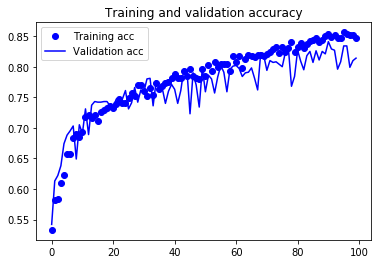

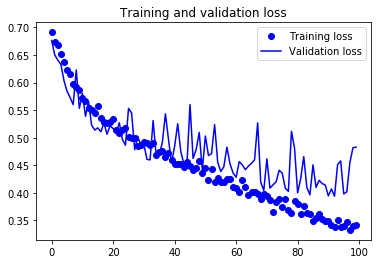

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()